# Base Model

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
df=pd.read_csv("Maternal Health Risk Data Set.csv")

In [3]:
df1 = df.copy()

In [4]:
df.drop(columns=["BodyTemp"], inplace = True)

In [5]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel
0,25,130,80,15.0,86,high risk
1,35,140,90,13.0,70,high risk
2,29,90,70,8.0,80,high risk
3,30,140,85,7.0,70,high risk
4,35,120,60,6.1,76,low risk


In [6]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   HeartRate    1014 non-null   int64  
 5   RiskLevel    1014 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.7+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()

In [10]:
df['RiskLevel'] = label_encoder.fit_transform(df['RiskLevel'])

In [11]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel
0,25,130,80,15.00,86,0
1,35,140,90,13.00,70,0
2,29,90,70,8.00,80,0
3,30,140,85,7.00,70,0
4,35,120,60,6.10,76,1
5,23,140,80,7.01,70,0
6,23,130,70,7.01,78,2
7,35,85,60,11.00,86,0
8,32,120,90,6.90,70,2
9,42,130,80,18.00,70,0


# Split X and y

In [12]:
X= df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']]
y = df['RiskLevel']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42, shuffle=True)

In [15]:
# Checking the shape of the `X_train`,`X_test`, `y_train` and `y_test`

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (811, 5)
X_test shape:  (203, 5)
y_train shape:  (811,)
y_test shape:  (203,)


# Training the machine learning model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Make predictions
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import f1_score

In [20]:
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class, 'binary' for binary classification
print(f"F1 Score: {f1}")

F1 Score: 0.5657266604792842


In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.5862068965517241


In [22]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[28 14  5]
 [ 3 67 10]
 [ 6 46 24]]


# K-Nearest Neighbours(KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Create and train the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

In [26]:
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class, 'binary' for binary classification
print(f"F1 Score: {f1}")

F1 Score: 0.7288880166904467


In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy}")

KNN Accuracy: 0.729064039408867


In [28]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[37  3  7]
 [ 7 57 16]
 [ 6 16 54]]


# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Create and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.8078817733990148


In [33]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[40  1  6]
 [ 5 60 15]
 [ 3  9 64]]


# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.8177339901477833


In [38]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[40  2  5]
 [ 3 60 17]
 [ 3  7 66]]


# Support Vector Machine

In [39]:
from sklearn.svm import SVC

In [40]:
# Create and train the model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [41]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.6305418719211823


In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[34 11  2]
 [ 1 76  3]
 [ 7 51 18]]


# Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
# Create and train the model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [46]:
# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy}")

Gradient Boosting Accuracy: 0.7487684729064039


In [47]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[39  4  4]
 [ 2 61 17]
 [ 5 19 52]]


# XGBOOST CLASSIFIER

In [48]:
import xgboost as xgb

In [49]:
# Create and train the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:50:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

XGBoost Accuracy: 0.8472906403940886


In [51]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[41  2  4]
 [ 4 67  9]
 [ 3  9 64]]


# Ridge Regression

In [52]:
from sklearn.linear_model import Ridge
import numpy as np

In [53]:
# Define Ridge Regression model with regularization parameter alpha (lambda in math terms)
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha for stronger or weaker regularization

# Fit the model
ridge_model.fit(X, y)

Ridge()

In [54]:
# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ridge Regression: {accuracy}")

Ridge Regression: 0.8472906403940886


In [55]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[41  2  4]
 [ 4 67  9]
 [ 3  9 64]]


# Standard Model Including EDA

In [56]:
#import data
df = pd.read_csv("Maternal Health Risk Data Set.csv")

In [57]:
df1 = df.copy()

In [58]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [59]:
df.drop(columns=["BodyTemp"], inplace = True)

In [60]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel
0,25,130,80,15.00,86,high risk
1,35,140,90,13.00,70,high risk
2,29,90,70,8.00,80,high risk
3,30,140,85,7.00,70,high risk
4,35,120,60,6.10,76,low risk
5,23,140,80,7.01,70,high risk
6,23,130,70,7.01,78,mid risk
7,35,85,60,11.00,86,high risk
8,32,120,90,6.90,70,mid risk
9,42,130,80,18.00,70,high risk


# Exploratory Data Analysis

In [61]:
#column data type, this will help us understand the type of data we are working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   HeartRate    1014 non-null   int64  
 5   RiskLevel    1014 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.7+ KB


In [62]:
#number of rows and columns
df.shape

(1014, 6)

In [63]:
#descriptive statistics
df.describe()

,Age,SystolicBP,DiastolicBP,BS,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,74.301775
std,13.474386,18.403913,13.885796,3.293532,8.088702
min,10.000000,70.000000,49.000000,6.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,90.000000


In [64]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'RiskLevel'], dtype='object')

# Outlier Detection

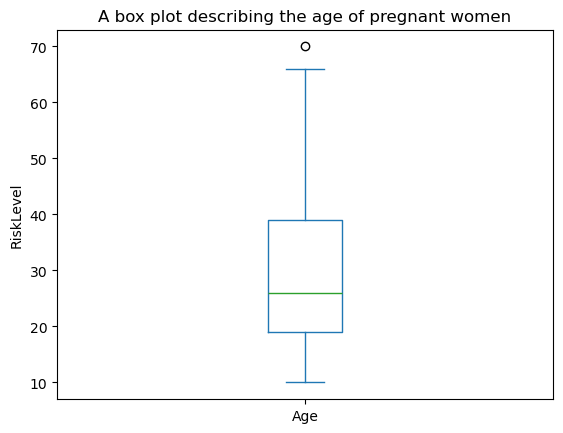

In [65]:
df["Age"].plot(kind="box")
plt.title("A box plot describing the age of pregnant women")
plt.ylabel("RiskLevel")
plt.show()

In [66]:
df['Age'] = df.Age.apply(lambda x: x if x < 60 else 60)

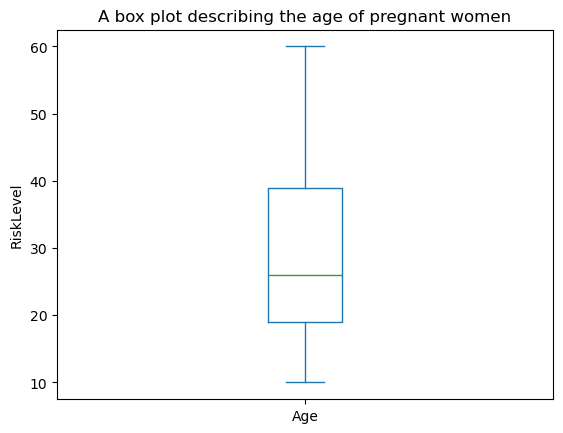

In [67]:
df["Age"].plot(kind="box")
plt.title("A box plot describing the age of pregnant women")
plt.ylabel("RiskLevel")
plt.show()

In [68]:
df["Age"].describe()

count    1014.000000
mean       29.833333
std        13.379377
min        10.000000
25%        19.000000
50%        26.000000
75%        39.000000
max        60.000000
Name: Age, dtype: float64

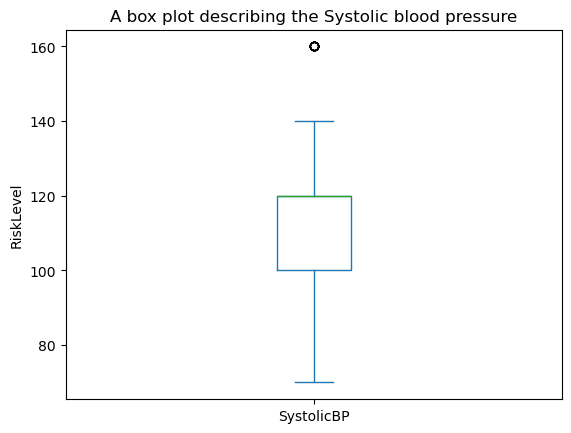

In [69]:
df['SystolicBP'].plot(kind="box")
plt.title("A box plot describing the Systolic blood pressure")
plt.ylabel("RiskLevel")
plt.show()

In [70]:
df['SystolicBP'] = df.SystolicBP.apply(lambda x: x if x < 140 else 140)

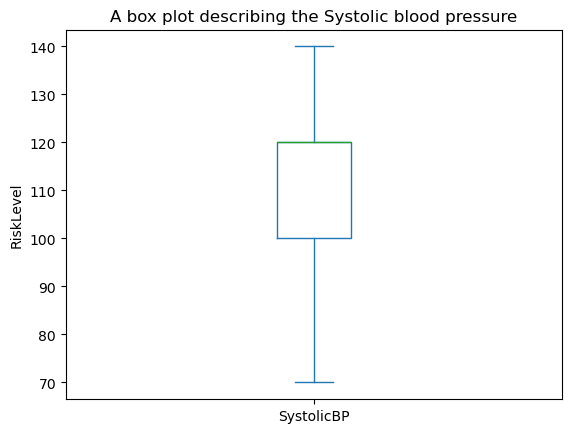

In [71]:
df['SystolicBP'].plot(kind="box")
plt.title("A box plot describing the Systolic blood pressure")
plt.ylabel("RiskLevel")
plt.show()

In [72]:
df['SystolicBP'].describe()

count    1014.000000
mean      113.000986
std        18.003701
min        70.000000
25%       100.000000
50%       120.000000
75%       120.000000
max       140.000000
Name: SystolicBP, dtype: float64

<Axes: ylabel='Frequency'>

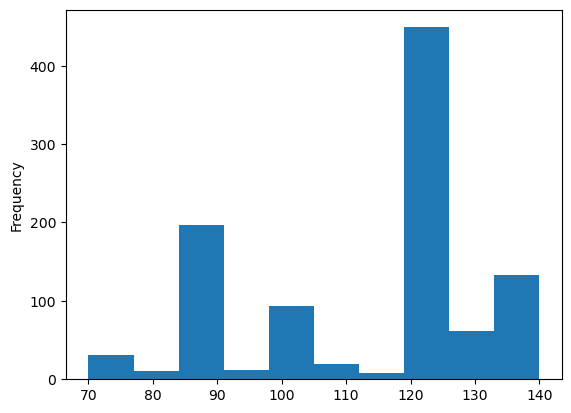

In [73]:
df['SystolicBP'].plot(kind="hist")

In [74]:
df['DiastolicBP'].describe()

count    1014.000000
mean       76.460552
std        13.885796
min        49.000000
25%        65.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: DiastolicBP, dtype: float64

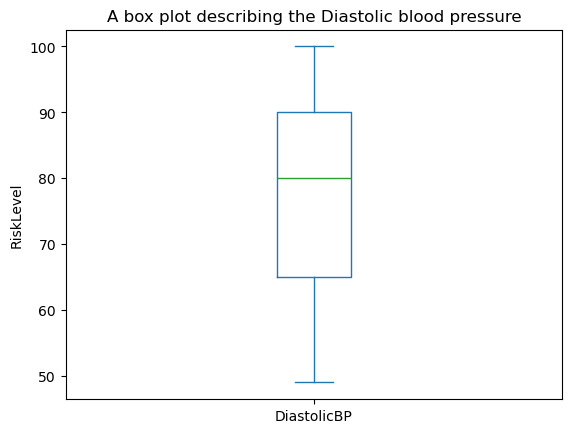

In [75]:
df['DiastolicBP'].plot(kind="box")
plt.title("A box plot describing the Diastolic blood pressure")
plt.ylabel("RiskLevel")
plt.show()

In [76]:
df['DiastolicBP']= df.DiastolicBP.apply(lambda x: x if x < 90 else 90)

<Axes: >

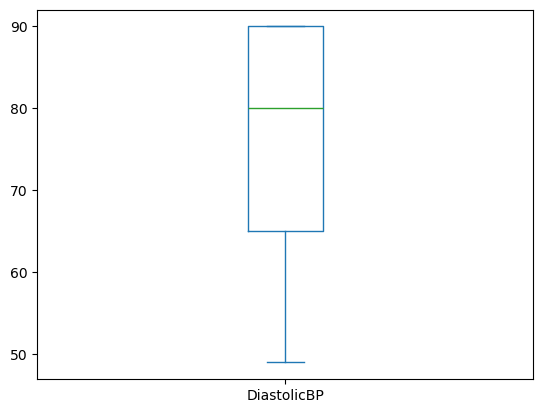

In [77]:
df['DiastolicBP'].plot(kind= "box")

In [78]:
df['DiastolicBP'].describe()

count    1014.000000
mean       75.425049
std        12.417618
min        49.000000
25%        65.000000
50%        80.000000
75%        90.000000
max        90.000000
Name: DiastolicBP, dtype: float64

<Axes: ylabel='Frequency'>

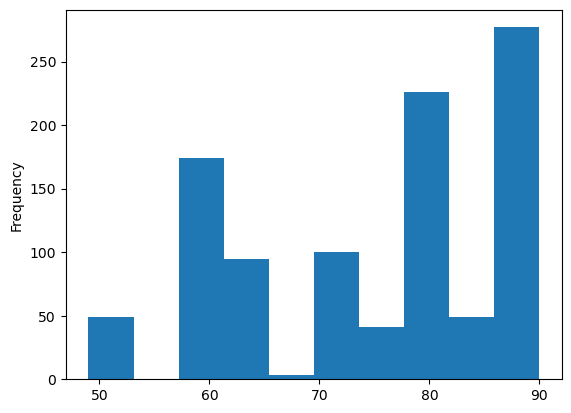

In [79]:
df['DiastolicBP'].plot(kind="hist")

In [80]:
df["BS"].describe()

count    1014.000000
mean        8.725986
std         3.293532
min         6.000000
25%         6.900000
50%         7.500000
75%         8.000000
max        19.000000
Name: BS, dtype: float64

<Axes: >

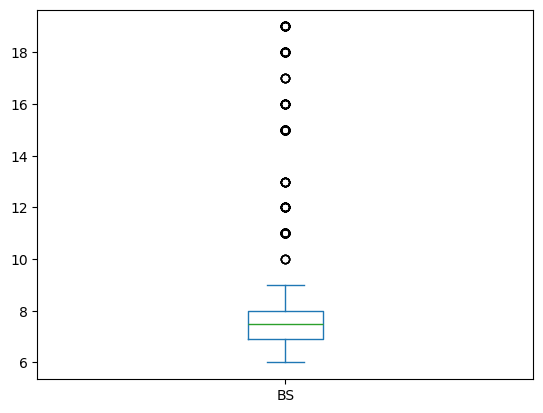

In [81]:
df["BS"].plot(kind="box")

In [82]:
df['BS']= df.BS.apply(lambda x: x if x < 8 else 8)

<Axes: >

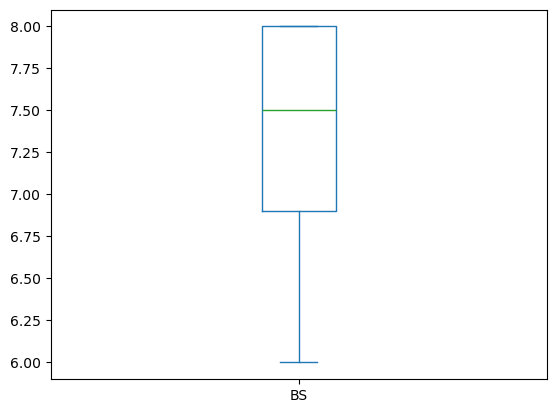

In [83]:
df["BS"].plot(kind="box")

In [84]:
df["BS"].describe()

count    1014.000000
mean        7.342357
std         0.592194
min         6.000000
25%         6.900000
50%         7.500000
75%         8.000000
max         8.000000
Name: BS, dtype: float64

<Axes: ylabel='Frequency'>

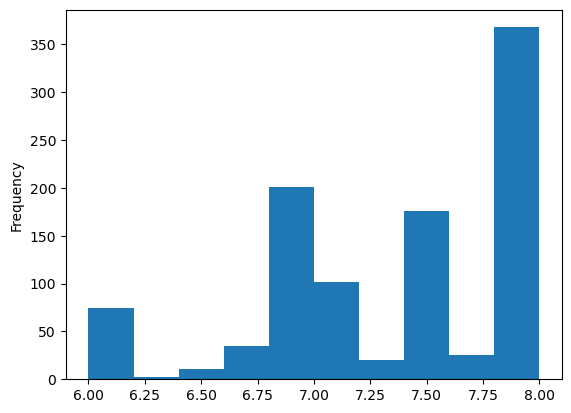

In [85]:
df["BS"].plot(kind= "hist")

In [86]:
df["Age"].corr(df["BS"])

0.2689807076420727

In [87]:
df["Age"].corr(df['DiastolicBP'])

0.3941883890883202

In [88]:
df['HeartRate'].describe()

count    1014.000000
mean       74.301775
std         8.088702
min         7.000000
25%        70.000000
50%        76.000000
75%        80.000000
max        90.000000
Name: HeartRate, dtype: float64

<Axes: >

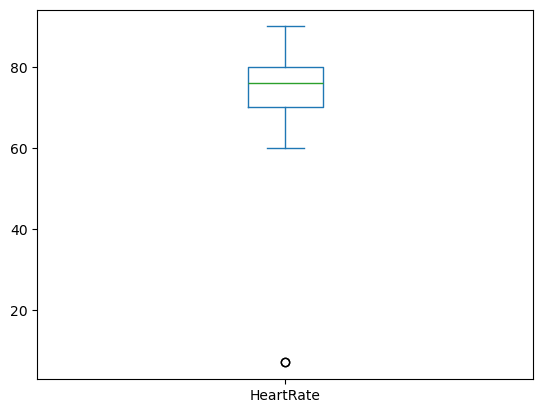

In [89]:
df['HeartRate'].plot(kind= "box")

In [90]:
df['HeartRate'] = df['HeartRate'].apply(lambda x: x if x > 60 else 60)

In [91]:
df['HeartRate'].describe()

count    1014.000000
mean       74.406312
std         7.541697
min        60.000000
25%        70.000000
50%        76.000000
75%        80.000000
max        90.000000
Name: HeartRate, dtype: float64

<Axes: >

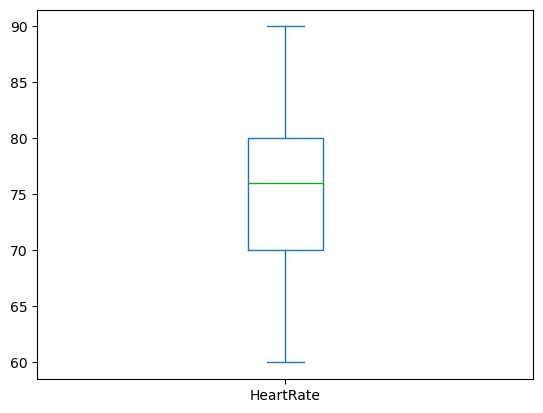

In [92]:
df['HeartRate'].plot(kind= "box")

In [93]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'RiskLevel'], dtype='object')

# Data Scaling

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
numerical_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [96]:
scaler = MinMaxScaler()

In [97]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
label_encoder = LabelEncoder()

In [100]:
df['RiskLevel'] = label_encoder.fit_transform(df1['RiskLevel'])

In [101]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel
0,0.30,0.857143,0.756098,1.000,0.866667,0
1,0.50,1.000000,1.000000,1.000,0.333333,0
2,0.38,0.285714,0.512195,1.000,0.666667,0
3,0.40,1.000000,0.878049,0.500,0.333333,0
4,0.50,0.714286,0.268293,0.050,0.533333,1
5,0.26,1.000000,0.756098,0.505,0.333333,0
6,0.26,0.857143,0.512195,0.505,0.600000,2
7,0.50,0.214286,0.268293,1.000,0.866667,0
8,0.44,0.714286,1.000000,0.450,0.333333,2
9,0.64,0.857143,0.756098,1.000,0.333333,0


<Axes: >

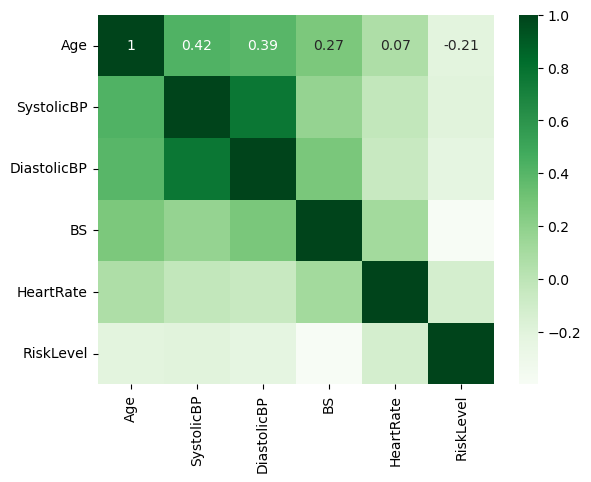

In [102]:
sns.heatmap(df.corr(), annot=True, cmap = "Greens")

# Split X and y

In [103]:
X= df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']]
y = df['RiskLevel']

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42, shuffle=True)

In [106]:
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(811, 5)
(203, 5)
(811,)
(203,)


# Training the Machine Learning Model

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

# Logistic Regression

In [108]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [109]:
# Make predictions
y_pred = model.predict(X_test)

In [110]:
from sklearn.metrics import f1_score

In [111]:
# Evaluate the model
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class, 'binary' for binary classification
print(f"F1 Score: {f1}")

F1 Score: 0.5291535528516631


In [112]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.5763546798029556


In [113]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[33  9  5]
 [ 5 69  6]
 [17 44 15]]


# K-Nearest Neighbours(KNN)

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
# Create and train the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [116]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

In [117]:
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class, 'binary' for binary classification
print(f"F1 Score: {f1}")

F1 Score: 0.6650951388223855


In [118]:
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy}")

KNN Accuracy: 0.6650246305418719


In [119]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[35  5  7]
 [ 4 54 22]
 [ 7 23 46]]


# Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
# Create and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [122]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

In [123]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.812807881773399


In [124]:
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class, 'binary' for binary classification
print(f"F1 Score: {f1}")

F1 Score: 0.8131190044075706


In [125]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[39  1  7]
 [ 5 62 13]
 [ 3  9 64]]


# Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [128]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

In [129]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.8226600985221675


In [130]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[41  1  5]
 [ 3 60 17]
 [ 3  7 66]]


# Support Vector Machine

In [131]:
from sklearn.svm import SVC

In [132]:
# Create and train the model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [133]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

In [134]:
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.5911330049261084


In [135]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[33  9  5]
 [ 3 73  4]
 [16 46 14]]


# Gradient Boosting

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

In [137]:
# Create and train the model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [138]:
# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy}")

Gradient Boosting Accuracy: 0.7586206896551724


In [139]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[39  3  5]
 [ 3 64 13]
 [ 7 18 51]]


# XGBoost Classifier

In [140]:
import xgboost as xgb

In [141]:
# Create and train the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:50:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [142]:
# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

XGBoost Accuracy: 0.8325123152709359


In [143]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[40  1  6]
 [ 4 65 11]
 [ 3  9 64]]


# Ridge Regression

In [144]:
from sklearn.linear_model import Ridge
import numpy as np

In [145]:
# Define Ridge Regression model with regularization parameter alpha (lambda in math terms)
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha for stronger or weaker regularization

# Fit the model
ridge_model.fit(X, y)

Ridge()

In [146]:
# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ridge Regression: {accuracy}")

Ridge Regression: 0.8325123152709359


In [147]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[40  1  6]
 [ 4 65 11]
 [ 3  9 64]]


# USING PIPELINE

# KNN Pipeline

In [148]:
from sklearn.pipeline import Pipeline

In [149]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler

In [150]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    sns.heatmap(cm, annot=True, cmap='Purples');
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [151]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Pipeline
input_steps_knn = [
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model', KNeighborsClassifier())
]

knn_pipe = Pipeline(input_steps_knn)

In [152]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', KNeighborsClassifier())])

In [153]:
y_pred = knn_pipe.predict(X_test)

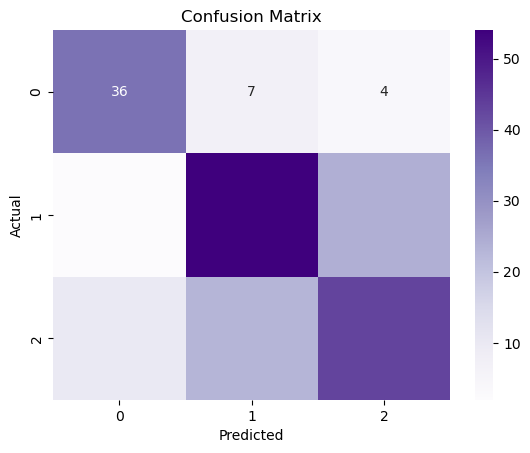

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        47
           1       0.64      0.68      0.66        80
           2       0.61      0.57      0.59        76

    accuracy                           0.66       203
   macro avg       0.67      0.67      0.67       203
weighted avg       0.65      0.66      0.65       203



array([[36,  7,  4],
       [ 2, 54, 24],
       [10, 23, 43]], dtype=int64)

In [154]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

# SVM Pipeline

In [155]:
from sklearn.svm import SVC

# SVM Pipeline
input_steps_svm = [
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model', SVC())
]

svm_pipe = Pipeline(input_steps_svm)

In [156]:
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', SVC())])

In [157]:
y_pred = svm_pipe.predict(X_test)

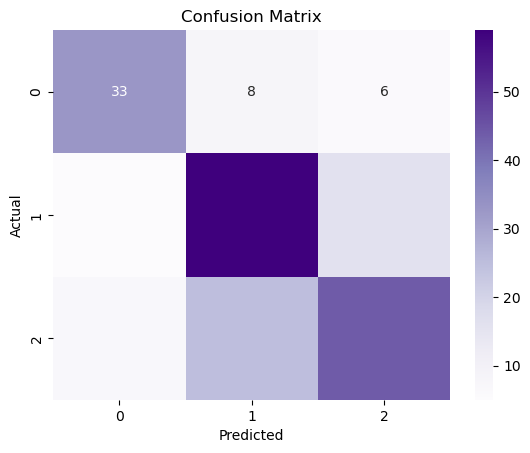

              precision    recall  f1-score   support

           0       0.73      0.70      0.72        47
           1       0.64      0.74      0.69        80
           2       0.67      0.58      0.62        76

    accuracy                           0.67       203
   macro avg       0.68      0.67      0.67       203
weighted avg       0.67      0.67      0.67       203



array([[33,  8,  6],
       [ 5, 59, 16],
       [ 7, 25, 44]], dtype=int64)

In [158]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

# Gradient Boosting Pipeline

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Pipeline
input_steps_gb = [
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model', GradientBoostingClassifier())
]

gb_pipe = Pipeline(input_steps_gb)

In [160]:
gb_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', GradientBoostingClassifier())])

In [161]:
y_pred = gb_pipe.predict(X_test)

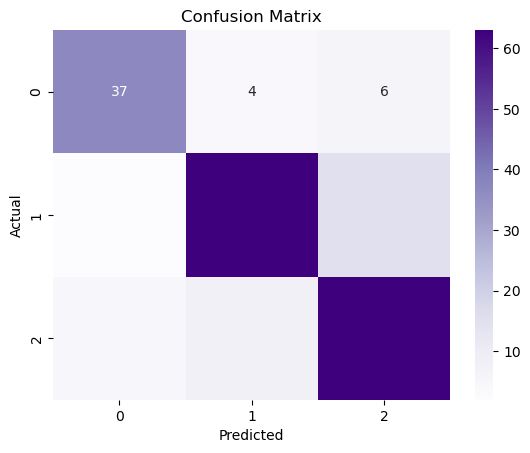

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        47
           1       0.84      0.79      0.81        80
           2       0.75      0.83      0.79        76

    accuracy                           0.80       203
   macro avg       0.81      0.80      0.80       203
weighted avg       0.81      0.80      0.80       203



array([[37,  4,  6],
       [ 2, 63, 15],
       [ 5,  8, 63]], dtype=int64)

In [162]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

# XGBoost Pipeline

In [163]:
from xgboost import XGBClassifier

# XGBoost Pipeline
input_steps_xgb = [
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model', XGBClassifier())
]

xgb_pipe = Pipeline(input_steps_xgb)

In [164]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_pol...one,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [165]:
y_pred = xgb_pipe.predict(X_test)

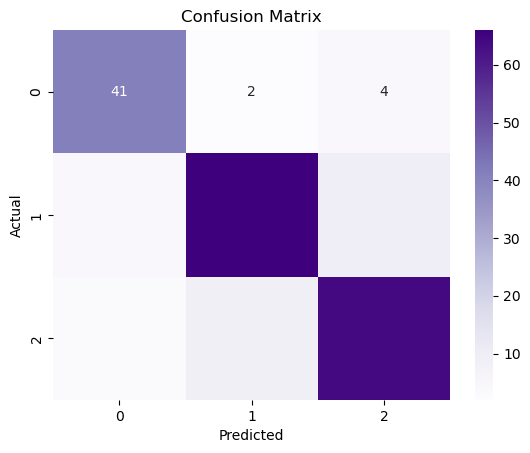

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.86      0.82      0.84        80
           2       0.82      0.84      0.83        76

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203



array([[41,  2,  4],
       [ 4, 66, 10],
       [ 3,  9, 64]], dtype=int64)

In [166]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

# Decision Tree Pipeline

In [167]:
input_steps = [
    ('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model', DecisionTreeClassifier())]


dtc_pipe = Pipeline(input_steps)

In [168]:
dtc_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', DecisionTreeClassifier())])

In [169]:
y_pred = dtc_pipe.predict(X_test)

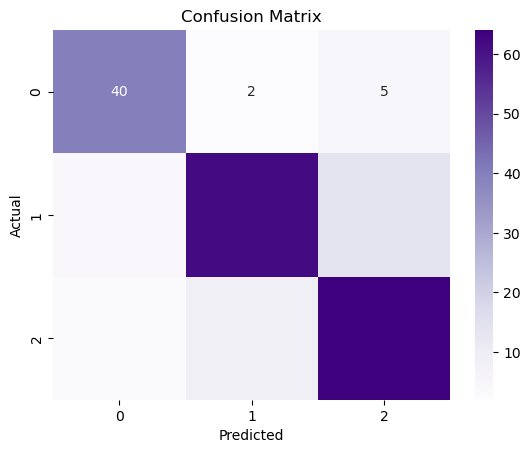

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        47
           1       0.85      0.78      0.81        80
           2       0.77      0.84      0.81        76

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



array([[40,  2,  5],
       [ 4, 62, 14],
       [ 3,  9, 64]], dtype=int64)

In [170]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

# Random Forest Pipeline

In [171]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Pipeline
input_steps_rf = [
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model', RandomForestClassifier())
]

rf_pipe = Pipeline(input_steps_rf)

In [172]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', RandomForestClassifier())])

In [173]:
y_pred = rf_pipe.predict(X_test)

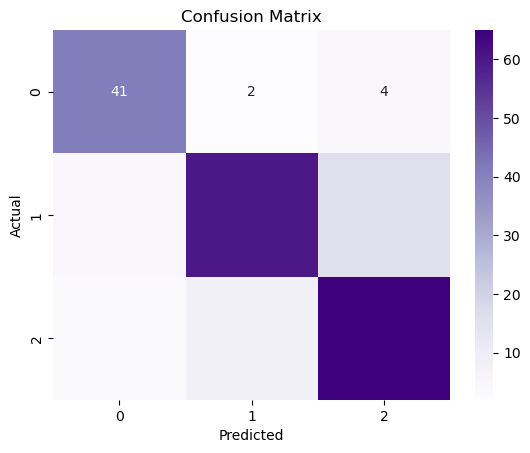

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.86      0.75      0.80        80
           2       0.76      0.86      0.81        76

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.82       203
weighted avg       0.82      0.82      0.82       203



array([[41,  2,  4],
       [ 4, 60, 16],
       [ 3,  8, 65]], dtype=int64)

In [174]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

In [175]:
accuracy_knn = knn_pipe.score(X_test, y_test)       # Accuracy for Knearest neighbour classifier
accuracy_svm = svm_pipe.score(X_test, y_test)       # Accuracy for svm classifier
accuracy_rf = rf_pipe.score(X_test, y_test)       # Accuracy for random forest classifier
accuracy_dtc = dtc_pipe.score(X_test, y_test)       # Accuracy for Decision tree classifier
accuracy_xgb = xgb_pipe.score(X_test, y_test)      # Accuracy for XGBClassifier
accuracy_gb = gb_pipe.score(X_test, y_test)        # Accuracy for HistGradientBoostingClassifier

print("SVM Accuracy: {:.2f}%".format(accuracy_svm * 100))
print("KNN Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dtc * 100))
print("XGBoost Accuracy: {:.2f}%".format(accuracy_xgb * 100))
print("Gradient Boosting Accuracy: {:.2f}%".format(accuracy_gb * 100))

# Find the best performing model
accuracies = {'Random Forest': accuracy_rf,
              'Decision Tree': accuracy_dtc,
              'XGBoost': accuracy_xgb,
              'KNN': accuracy_knn,
              'SVM': accuracy_svm,
              'Gradient Boosting': accuracy_gb}

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print("\nBest Performing Model: {} with an Accuracy of {:.2f}%".format(best_model, best_accuracy * 100))


SVM Accuracy: 67.00%
KNN Accuracy: 65.52%
Random Forest Accuracy: 81.77%
Decision Tree Accuracy: 81.77%
XGBoost Accuracy: 84.24%
Gradient Boosting Accuracy: 80.30%

Best Performing Model: XGBoost with an Accuracy of 84.24%
